In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

reading the csv file

In [22]:
path = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
df = pd.read_csv(path)
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


check the data types

In [23]:
df.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

is there any null or nan in the data set

In [24]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

fuel_unit has 180 missing values and its an object


lets look for the most occuring one 

In [29]:
df['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

since the measure of energy is BTU by standard, i want to check the fuel unit by the mmbtu

In [30]:
df_fuel = df[['fuel_unit', 'fuel_mmbtu_per_unit']]
df_fuel_unit = df_fuel.groupby(['fuel_unit'], as_index = False).count()
df_fuel_unit
#df_fuel

,fuel_unit,fuel_mmbtu_per_unit
0,bbl,7998
1,gal,84
2,gramsU,464
3,kgU,110
4,mcf,11354
5,mmbtu,180
6,mwdth,95
7,mwhth,100
8,ton,8958


fill the missing data with the most occuring in fuel_unit

In [31]:
df['fuel_unit'] = df['fuel_unit'].fillna('mcf')

check if there is still any missing data

In [32]:
df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

there is no nan values

In [33]:
df.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


check for any duplicate row

In [14]:
#check for duplicate row
df.duplicated().any()

False

In [15]:
df.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [16]:
#df['fuel_type_code_pudl'].value_counts()
df['report_year'].value_counts()

2000    1373
2001    1356
2005    1269
2007    1264
2010    1261
2006    1243
2012    1243
2011    1240
1994    1235
2008    1228
2009    1222
2003    1211
2002    1205
1995    1201
2013    1199
2004    1192
2014    1171
1998    1107
1997    1094
2015    1093
1996    1088
1999    1050
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [34]:
df.groupby('report_year').count()

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,,,,,
1994,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
1995,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201
1996,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088
1997,1094,1094,1094,1094,1094,1094,1094,1094,1094,1094
1998,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107
1999,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050
2000,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373
2001,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356
2002,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205


In [36]:
df.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


prints the first entries entered in 1994

In [37]:
#since the united states HEAT ENERGY is measured in BTU

df_check_btu = df[df['fuel_unit'] == 'mmbtu']
df_check_btu.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
194,f1_fuel_1994_12_46_1_7,46,1994,perry #1,nuclear,mmbtu,6619313.0,0.110455,1.170,0.00,1.170
195,f1_fuel_1994_12_46_1_10,46,1994,beaver valley #1,nuclear,mmbtu,28373373.0,0.127516,0.809,0.00,0.809
196,f1_fuel_1994_12_46_1_13,46,1994,beaver valley #2,nuclear,mmbtu,10192484.0,0.110176,0.695,0.00,0.695
315,f1_fuel_1994_12_85_4_12,85,1994,nine mile point 2,nuclear,mmbtu,16614614.0,0.011008,0.484,0.00,0.484
444,f1_fuel_1994_12_122_0_10,122,1994,"huron, gt",gas,mmbtu,10456.0,1.000000,2.150,2.15,2.150


In [38]:
df.describe(include = ['object'])

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29523
unique,29523,2315,6,9
top,f1_fuel_1994_12_24_0_1,big stone,gas,mcf
freq,1,156,11486,11534


In [39]:
df['fuel_type_code_pudl'].describe()

count     29523
unique        6
top         gas
freq      11486
Name: fuel_type_code_pudl, dtype: object

In [40]:

df.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

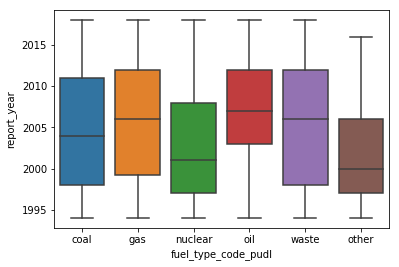

In [41]:
sns.boxplot(x = 'fuel_type_code_pudl', y = 'report_year', data = df)


In [42]:
#df = df.set_index('report_year')

In [43]:
df.tail()


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [20]:
df.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [60]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


## TEST QUIZ 

In [128]:
df_fuel_lowest = df[['fuel_type_code_pudl','fuel_qty_burned']]
df_fuel_burned = df_fuel_lowest.groupby('fuel_type_code_pudl').mean()
df_fuel_burned  #['fuel_qty_burned']
np.min(df_fuel_burned['fuel_qty_burned'])

63116.7748015873

In [131]:
df_fuel_lowest = df[['fuel_type_code_pudl','fuel_cost_per_unit_burned']]
df_fuel_burned = df_fuel_lowest.groupby('fuel_type_code_pudl').mean()
df_fuel_burned  #['fuel_qty_burned']
#np.min(df_fuel_burned['fuel_cost_per_unit_burned'])

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
coal,67.421830
gas,13.659397
nuclear,4955.157002
oil,168.877086
other,18.253856
waste,19.518122


In [61]:
df.describe(include = "all")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29523,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_24_0_1,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11534,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [64]:
total = df['fuel_unit'].count()
total

29523

In [66]:
percent = (180 / total) * 100
percent

0.609694136774718

In [74]:
correlation = df.corr()
correlation


,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [80]:
burned_fuel = correlation[['fuel_cost_per_unit_burned']]
burned_fuel

,fuel_cost_per_unit_burned
utility_id_ferc1,-0.037863
report_year,0.013599
fuel_qty_burned,-0.018535
fuel_mmbtu_per_unit,-0.010034
fuel_cost_per_unit_burned,1.000000
fuel_cost_per_unit_delivered,0.011007
fuel_cost_per_mmbtu,-0.000437


In [81]:
burned_fuel.sort_values(by='fuel_cost_per_unit_burned', ascending=False)


,fuel_cost_per_unit_burned
fuel_cost_per_unit_burned,1.000000
report_year,0.013599
fuel_cost_per_unit_delivered,0.011007
fuel_cost_per_mmbtu,-0.000437
fuel_mmbtu_per_unit,-0.010034
fuel_qty_burned,-0.018535
utility_id_ferc1,-0.037863


In [77]:
correlation.sort_values(by='fuel_cost_per_unit_burned', ascending=False)


,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122


In [82]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [86]:
df_percent = df[['report_year','fuel_type_code_pudl','fuel_cost_per_unit_burned']]
df_percent.head()

,report_year,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,1994,coal,18.59
1,1994,coal,18.58
2,1994,coal,39.72
3,1994,coal,47.21
4,1994,gas,2.77


In [103]:
df_coal_1994 = df_percent[(df_percent['fuel_type_code_pudl'] == 'coal') & (df_percent['report_year'] == 1994)]
df_coal_1994.head()


,report_year,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,1994,coal,18.59
1,1994,coal,18.58
2,1994,coal,39.72
3,1994,coal,47.21
5,1994,coal,44.24


In [104]:
df_coal_1998 = df_percent[(df_percent['fuel_type_code_pudl'] == 'coal') & (df_percent['report_year'] == 1998)]
df_coal_1998.head()

,report_year,fuel_type_code_pudl,fuel_cost_per_unit_burned
4618,1998,coal,19.282
4619,1998,coal,19.280
4620,1998,coal,26.550
4622,1998,coal,26.550
4624,1998,coal,30.936


In [109]:
df_coal_1994_sum = df_coal_1994['fuel_cost_per_unit_burned'].sum()
df_coal_1994_sum

14984.572000000002

In [110]:
df_coal_1998_sum = df_coal_1998['fuel_cost_per_unit_burned'].sum()
df_coal_1998_sum

11902.597

In [116]:
#fuel_burned_sum = df['fuel_cost_per_unit_burned'].sum()
#fuel_burned_sum

In [115]:
((df_coal_1998_sum - df_coal_1994_sum)/(df_coal_1994_sum)) * 100

-20.56765451826053

In [117]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [120]:
high_year = df[['report_year','fuel_cost_per_unit_delivered']]
high_year.head()

,report_year,fuel_cost_per_unit_delivered
0,1994,18.53
1,1994,18.53
2,1994,38.12
3,1994,45.99
4,1994,2.77


In [125]:
(high_year.groupby('report_year').mean()).sort_values(by='fuel_cost_per_unit_delivered', ascending=False)

,fuel_cost_per_unit_delivered
report_year,
1997,11140.197239
1996,9196.705948
2000,985.362877
2009,652.694163
2018,499.269966
2015,326.535511
1998,287.154420
2014,192.737183
2013,172.307591


In [132]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [133]:
df['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [137]:
#sns.boxplot(y= 'fuel_mmbtu_per_unit', data = df)

In [138]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [140]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [141]:
fuel_burned_qty = df['fuel_qty_burned']
skew(fuel_burned_qty)

15.850690077422112

In [144]:
fuel_burned_qty = df['fuel_qty_burned']
kurtosis(fuel_burned_qty)

651.2589365474387